# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#Create list
city_data = []

#Create counters
recordNum = 1
setNum = 1

#Create loop to go through records
for i, city in enumerate(cities):
    
    #Group cities
    if (i % 50 == 0 and i >= 50):
        setNum +=1
        recordNum = 0
    
    city_url = url + "&q=" + city
    
    #track city, record, and set
    print("Retreiving Record %s of Set %s | %s" % (recordNum, setNum, city))
    
    recordNum += 1
    
    #API call
    try:
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_cloud = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_humid = city_weather["main"]["humidity"]
        city_temp_max = city_weather["main"]["temp_max"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        #Append data to list
        city_data.append({"City": city,
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Cloudiness": city_cloud,
                         "Wind Speed": city_wind,
                         "Humidity": city_humid,
                         "Max Temp": city_temp_max,
                         "Country": city_country,
                         "Date": city_date})
        
    except:
        print("Missing field/result... skipping.")    
        pass
    
#Notify when done
print("Process Complete")
    
        

Retreiving Record 1 of Set 1 | georgetown
Retreiving Record 2 of Set 1 | les cayes
Retreiving Record 3 of Set 1 | zyryanka
Retreiving Record 4 of Set 1 | bluff
Retreiving Record 5 of Set 1 | wajir
Retreiving Record 6 of Set 1 | rikitea
Retreiving Record 7 of Set 1 | mar del plata
Retreiving Record 8 of Set 1 | cape town
Retreiving Record 9 of Set 1 | punta arenas
Retreiving Record 10 of Set 1 | capao da canoa
Retreiving Record 11 of Set 1 | severo-kurilsk
Retreiving Record 12 of Set 1 | ushuaia
Retreiving Record 13 of Set 1 | albany
Retreiving Record 14 of Set 1 | yellowknife
Retreiving Record 15 of Set 1 | kruisfontein
Retreiving Record 16 of Set 1 | kaitangata
Retreiving Record 17 of Set 1 | puerto ayora
Retreiving Record 18 of Set 1 | port lincoln
Retreiving Record 19 of Set 1 | hermanus
Retreiving Record 20 of Set 1 | labuhan
Retreiving Record 21 of Set 1 | caramay
Retreiving Record 22 of Set 1 | ajdabiya
Retreiving Record 23 of Set 1 | taolanaro
Missing field/result... skipping.
R

Retreiving Record 35 of Set 4 | pacific grove
Retreiving Record 36 of Set 4 | hay river
Retreiving Record 37 of Set 4 | ciudad bolivar
Retreiving Record 38 of Set 4 | pangai
Retreiving Record 39 of Set 4 | okhotsk
Retreiving Record 40 of Set 4 | la ronge
Retreiving Record 41 of Set 4 | pierre
Retreiving Record 42 of Set 4 | arosa
Retreiving Record 43 of Set 4 | lahat
Retreiving Record 44 of Set 4 | westport
Retreiving Record 45 of Set 4 | maua
Retreiving Record 46 of Set 4 | hualmay
Retreiving Record 47 of Set 4 | zambezi
Retreiving Record 48 of Set 4 | niquelandia
Retreiving Record 49 of Set 4 | placer
Retreiving Record 0 of Set 5 | longyearbyen
Retreiving Record 1 of Set 5 | barsovo
Retreiving Record 2 of Set 5 | khatanga
Retreiving Record 3 of Set 5 | los llanos de aridane
Retreiving Record 4 of Set 5 | riohacha
Retreiving Record 5 of Set 5 | mayumba
Retreiving Record 6 of Set 5 | hongan
Missing field/result... skipping.
Retreiving Record 7 of Set 5 | bay roberts
Retreiving Record 8

Retreiving Record 24 of Set 8 | buchanan
Retreiving Record 25 of Set 8 | klaksvik
Retreiving Record 26 of Set 8 | marcona
Missing field/result... skipping.
Retreiving Record 27 of Set 8 | dolinsk
Retreiving Record 28 of Set 8 | jiddah
Missing field/result... skipping.
Retreiving Record 29 of Set 8 | panuco
Retreiving Record 30 of Set 8 | beloha
Retreiving Record 31 of Set 8 | storforshei
Retreiving Record 32 of Set 8 | pringsewu
Retreiving Record 33 of Set 8 | alotau
Missing field/result... skipping.
Retreiving Record 34 of Set 8 | cachoeira do sul
Retreiving Record 35 of Set 8 | rauma
Retreiving Record 36 of Set 8 | liberal
Retreiving Record 37 of Set 8 | vreed en hoop
Missing field/result... skipping.
Retreiving Record 38 of Set 8 | requena
Retreiving Record 39 of Set 8 | binzhou
Retreiving Record 40 of Set 8 | puerto del rosario
Retreiving Record 41 of Set 8 | san rafael
Retreiving Record 42 of Set 8 | itarema
Retreiving Record 43 of Set 8 | san jose
Retreiving Record 44 of Set 8 | 

Retreiving Record 7 of Set 12 | ugoofaaru
Retreiving Record 8 of Set 12 | warqla
Missing field/result... skipping.
Retreiving Record 9 of Set 12 | tigil
Retreiving Record 10 of Set 12 | chapais
Retreiving Record 11 of Set 12 | angra
Missing field/result... skipping.
Retreiving Record 12 of Set 12 | kavaratti
Retreiving Record 13 of Set 12 | wanning
Retreiving Record 14 of Set 12 | kemijarvi
Retreiving Record 15 of Set 12 | adre
Retreiving Record 16 of Set 12 | mirina
Missing field/result... skipping.
Retreiving Record 17 of Set 12 | santa maria
Retreiving Record 18 of Set 12 | sambava
Retreiving Record 19 of Set 12 | catamarca
Retreiving Record 20 of Set 12 | trofors
Retreiving Record 21 of Set 12 | boyuibe
Retreiving Record 22 of Set 12 | australind
Retreiving Record 23 of Set 12 | jimo
Retreiving Record 24 of Set 12 | tezu
Retreiving Record 25 of Set 12 | comodoro rivadavia
Retreiving Record 26 of Set 12 | fairbanks
Retreiving Record 27 of Set 12 | phuthaditjhaba
Retreiving Record 28

In [21]:
#Create dataframe
city_data_df = pd.DataFrame(city_data)

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


city_data_df.head()

,City,Lat,Lng,Cloudiness,Wind Speed,Humidity,Max Temp,Country,Date
0,georgetown,5.41,100.34,20,2.24,94,78.80,MY,1595202546
1,les cayes,18.20,-73.75,100,5.44,75,80.91,HT,1595202546
2,zyryanka,65.75,150.85,10,15.70,41,75.40,RU,1595202546
3,bluff,-46.60,168.33,75,3.00,83,39.00,NZ,1595202546
4,wajir,1.75,40.06,85,17.20,68,72.64,KE,1595202546


In [14]:
city_data_df.count()

City          538
Lat           538
Lng           538
Cloudiness    538
Wind Speed    538
Humidity      538
Max Temp      538
Country       538
Date          538
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
city_data_df.to_csv(output_data_file, index_label="ID")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

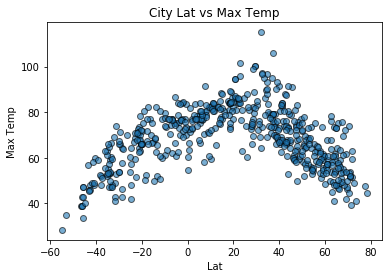

In [22]:
plt.scatter(lats, max_temps, edgecolor="black", marker="o",alpha=.6, label="Cities")

plt.title("City Lat vs Max Temp")
plt.ylabel("Max Temp")
plt.xlabel("Lat")

plt.savefig("../output_data/LatvTemp.png")

plt.show()

#### Latitude vs. Humidity Plot

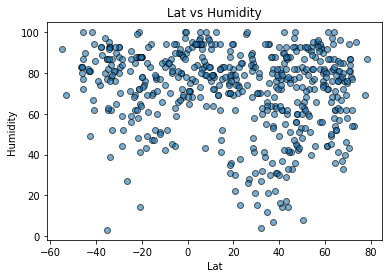

In [23]:
plt.scatter(lats, humidity,edgecolor="black", marker="o",alpha=.6, label="Cities")

plt.title("Lat vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Lat")

plt.savefig("../output_data/LatvHumid.png")

plt.show()

#### Latitude vs. Cloudiness Plot

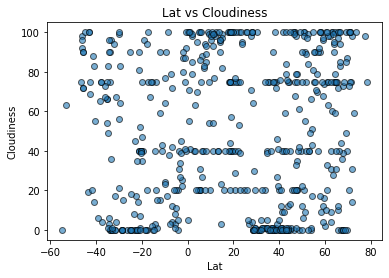

In [24]:
plt.scatter(lats, cloudiness, edgecolor="black", marker="o",alpha= .6, label="Cities")

plt.title("Lat vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Lat")

plt.savefig("../output_data/LatvCloud.png")

plt.show()

#### Latitude vs. Wind Speed Plot

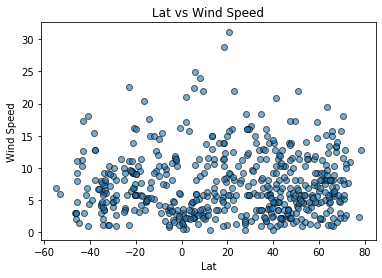

In [25]:
plt.scatter(lats, wind_speed, edgecolor="black",marker="o", alpha=.6,label="Cities")

plt.title("Lat vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Lat")

plt.savefig("../output_data/LatvWind.png")

plt.show()

## Linear Regression

In [51]:
# OPTIONAL: Create a function to create Linear Regression plots
def plt_lr(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values, marker="o")
    plt.plot(x_values, regress_values,"r-")
    plt.annotate(line, text_coordinates, fontsize=10, color="black")
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f"r-squared = {rvalue}")
    plt.show()

In [40]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi = city_data_df.loc[(city_data_df["Lat"]>=0)]
south_hemi = city_data_df.loc[(city_data_df["Lat"]<0)]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared = -0.6323312953443523


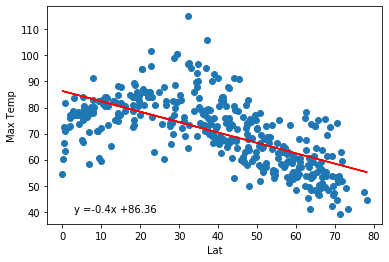

In [52]:
x_values = north_hemi["Lat"]
y_values = north_hemi["Max Temp"]
plt_lr(x_values, y_values, "Max Temp", (3, 40))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared = 0.7771890633653403


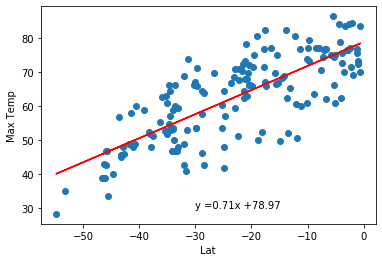

In [53]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Max Temp"]
plt_lr(x_values, y_values, "Max Temp", (-30, 30))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared = -0.09221867893104317


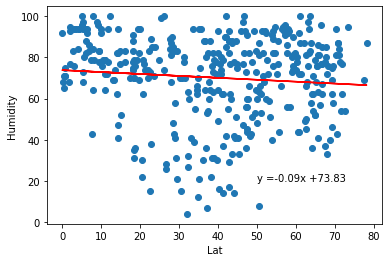

In [56]:
x_values = north_hemi["Lat"]
y_values = north_hemi["Humidity"]
plt_lr(x_values, y_values, "Humidity", (50,20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared = -0.05802807652420184


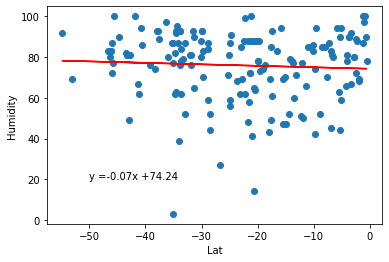

In [58]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Humidity"]
plt_lr(x_values, y_values, "Humidity", (-50,20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared = -0.049244536884517624


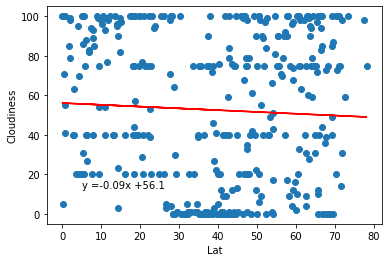

In [61]:
x_values = north_hemi["Lat"]
y_values = north_hemi["Cloudiness"]
plt_lr(x_values, y_values,"Cloudiness", (5,13))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared = -0.16117691645948204


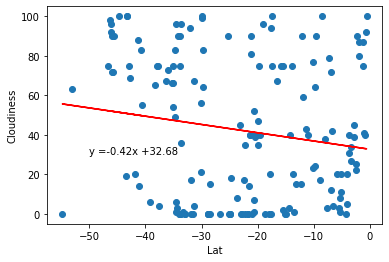

In [63]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Cloudiness"]
plt_lr(x_values, y_values,"Cloudiness", (-50,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared = -0.0002467191969266123


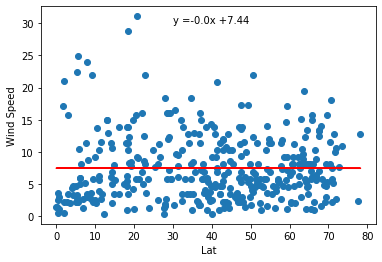

In [65]:
x_values = north_hemi["Lat"]
y_values = north_hemi["Wind Speed"]
plt_lr(x_values, y_values, "Wind Speed", (30,30))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared = -0.16117691645948204


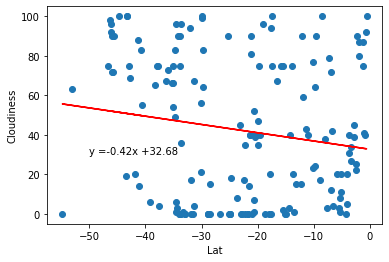

In [67]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Cloudiness"]
plt_lr(x_values, y_values,"Cloudiness", (-50,30))